### Chain Using Langgraph

In [8]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [11]:
from langchain_core.messages import HumanMessage, AIMessage
from pprint import pprint

messages=[AIMessage(content=f"Please let me Know How can i help you ?",name="LLMModel")]
messages.append(HumanMessage(content=f"I want to learn coding",name="Harish"))
messages.append(AIMessage(content=f"Sure, what language you want to learn ?", name="LLMModel"))
messages.append(HumanMessage(content=f"I want to learn Python programming language",name="Harish"))

for message in messages:
    message.pretty_print()

================================== Ai Message ==================================
Name: LLMModel

Please let me Know How can i help you ?
================================ Human Message =================================
Name: Harish

I want to learn coding
================================== Ai Message ==================================
Name: LLMModel

Sure, what language you want to learn ?
================================ Human Message =================================
Name: Harish

I want to learn Python programming language


In [13]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="openai/gpt-oss-20b")
result=llm.invoke(messages)

In [14]:
result.response_metadata

{'token_usage': {'completion_tokens': 1640,
  'prompt_tokens': 118,
  'total_tokens': 1758,
  'completion_time': 1.790725847,
  'completion_tokens_details': {'reasoning_tokens': 28},
  'prompt_time': 0.007802438,
  'prompt_tokens_details': None,
  'queue_time': 0.103451732,
  'total_time': 1.798528285},
 'model_name': 'openai/gpt-oss-20b',
 'system_fingerprint': 'fp_e99e93f2ac',
 'service_tier': 'on_demand',
 'finish_reason': 'stop',
 'logprobs': None,
 'model_provider': 'groq'}

In [15]:
def add(a:int,b:int)->int:
    """
    Args:
        a: The first number to add.
        b: The second number to add.

    Returns:
        int
    """
    return a + b
    

In [17]:
# Binding tool with LLM

llm_with_tools=llm.bind_tools([add])

tool_call=llm_with_tools.invoke([HumanMessage(content=f"Hey What is 2 + 2 ?",name="Harish")])

In [18]:
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'fc_e5819c19-a171-41cc-b3a5-ef12d1091021',
  'type': 'tool_call'}]

In [19]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langchain_core.messages import AnyMessage

class State(TypedDict):
    messages: list[AnyMessage]



In [21]:
from langgraph.graph.message import add_messages
from typing import Annotated
import operator
class State(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]
    

In [22]:
# Reducer with add_messages
initial_messages=[AIMessage(content=f"Please let me Know How can i help you ?", name="LLMModel")]
initial_messages.append(HumanMessage(content=f"I want to learn coding", name="Harish"))
initial_messages

[AIMessage(content='Please let me Know How can i help you ?', additional_kwargs={}, response_metadata={}, name='LLMModel'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Harish')]

In [24]:
ai_messages=(AIMessage(content=f"Sure, what language you want to learn ?", name="LLMModel"))
add_messages(initial_messages,ai_messages)

[AIMessage(content='Please let me Know How can i help you ?', additional_kwargs={}, response_metadata={}, name='LLMModel', id='b40facdc-ff88-4c66-a00c-c0a247ed1bed'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Harish', id='e59cbc63-6095-4312-9a5b-9ccd7a4a6107'),
 AIMessage(content='Sure, what language you want to learn ?', additional_kwargs={}, response_metadata={}, name='LLMModel', id='611b9866-c18b-472a-b2f2-e8c997824671')]

In [25]:
def llm_tool(state:State):
    return{"messages":[llm_with_tools.invoke(state["messages"])]}

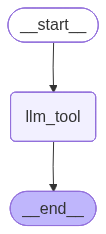

In [27]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

builder=StateGraph(State)
builder.add_node("llm_tool",llm_tool)
builder.add_edge(START, "llm_tool")
builder.add_edge("llm_tool", END)

graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [28]:
messages = graph.invoke({"messages":"What is 2 plus 2"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (fc_49ab184e-3713-43b6-95d5-7a5147eddfc1)
 Call ID: fc_49ab184e-3713-43b6-95d5-7a5147eddfc1
  Args:
    a: 2
    b: 2
